# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [10]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [11]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The staff are very rude and not...
1,✅ Trip Verified | Good domestic flight operat...
2,Not Verified | Failed at all basic travel fund...
3,✅ Trip Verified | They lost my baggage in a v...
4,✅ Trip Verified | Late boarding led to a one ...


In [43]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [42]:
reviews = pd.read_csv("BA_reviews.csv")
reviews = reviews.pop('reviews')
reviews

0       Not Verified | The staff are very rude and not...
1       ✅ Trip Verified |  Good domestic flight operat...
2       Not Verified | Failed at all basic travel fund...
3       ✅ Trip Verified |  They lost my baggage in a v...
4       ✅ Trip Verified |  Late boarding led to a one ...
                              ...                        
3617    LHR-JFK-LAX-LHR. Check in was ok apart from be...
3618    LHR to HAM. Purser addresses all club passenge...
3619    My son who had worked for British Airways urge...
3620    London City-New York JFK via Shannon on A318 b...
3621    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3622, dtype: object

In [40]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [44]:
reviews = reviews.str.replace('Trip Verified |','')
reviews = reviews.str.replace('✅','')

reviews = reviews.str.replace('|','')
reviews = reviews.str.replace(r'\b(\w{1,3})\b','')

reviews = reviews.apply(remove_punctuation)
reviews



0       Not Verified  The staff are very rude and not ...
1          Good domestic flight operated by BA Cityfly...
2       Not Verified  Failed at all basic travel funda...
3          They lost my baggage in a very simple situa...
4          Late boarding led to a one hour flight leav...
                              ...                        
3617    LHRJFKLAXLHR Check in was ok apart from being ...
3618    LHR to HAM Purser addresses all club passenger...
3619    My son who had worked for British Airways urge...
3620    London CityNew York JFK via Shannon on A318 bu...
3621    SINLHR BA12 B747436 First Class Old aircraft 1...
Name: reviews, Length: 3622, dtype: object

In [26]:
cleaned_reviews = [' '.join([word for word in review.split() if len(word) > 4]) for review in reviews]
cleaned_reviews

['Verified staff trained properly exceptions children elderly people price ticket expensive given distance service extremely extremely',
 'domestic flight operated Cityflyer Ground service checkin Edinburgh airport particularly friendly helpful flight departed arrived earlier scheduled complimentary drink snack albeit served Generally seems quality Cityflyer subsidiary superior mainline British Airways flights',
 'Verified Failed basic travel fundamentals flight delayed Staff demanded check carry luggage though carry allowance tight connection totally ignored Staff quite unpleasant',
 'baggage simple situation three weeks communication whatsoever connection checkpoint Heathrow before connecting flight agent insists checking luggage since plane claim arrival airport immediately three weeks communication whatsoever online status still “Searching updates conclusion males effort missing',
 'boarding flight leaving hours single staff member turned board flight shortly before flight depart T

In [66]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
cleaned_reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(cleaned_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'corpus'

In [46]:
frequent_words = pd.Series(' '.join(cleaned_reviews).lower().split()).value_counts()[:50]
frequent_words

flight         6436
service        2758
london         2139
british        2102
airways        2086
seats          2074
cabin          1930
which          1870
class          1831
there          1696
staff          1538
business       1530
heathrow       1497
would          1475
their          1413
economy        1405
first          1259
after          1226
flights        1155
return         1095
other          1062
plane          1020
again          1018
hours          1016
lounge         1007
passengers     1000
verified        989
airline         986
boarding        977
about           973
could           933
experience      897
check           881
before          866
review          857
aircraft        843
airlines        723
really          707
drinks          702
better          688
customer        668
premium         666
comfortable     666
minutes         661
great           652
airport         644
served          639
being           626
world           621
flying          615


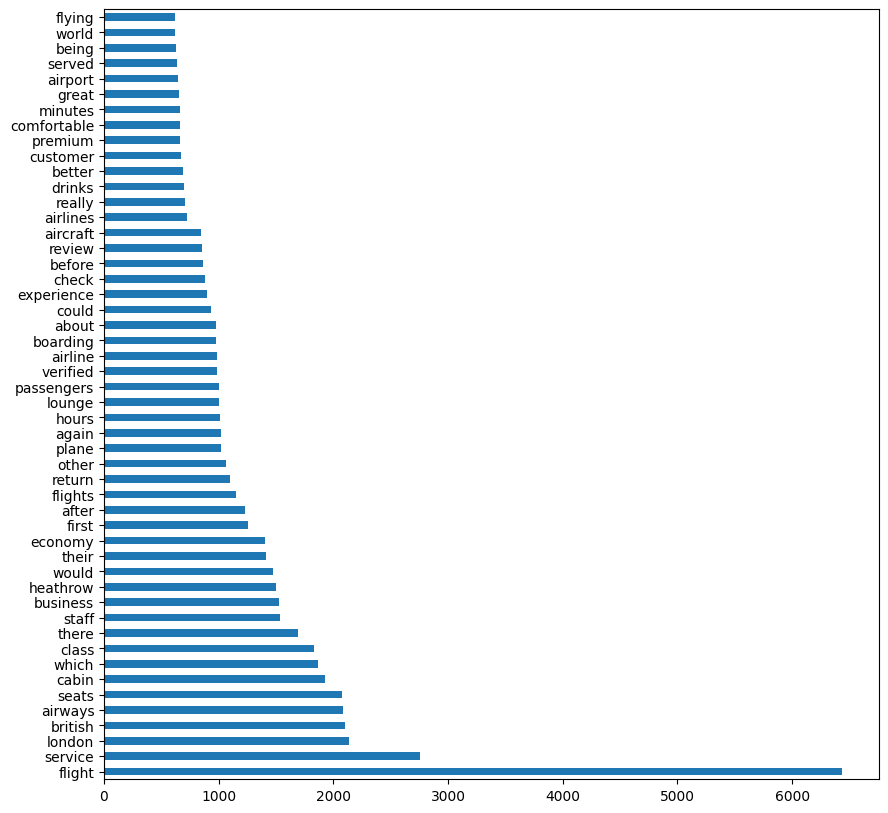

In [47]:
plt.figure(figsize=(10,10))
frequent_words.plot.barh(x=frequent_words[0],y=frequent_words[1])
plt.show()

In [48]:
categories = ['negative','postive']
num_cat = len(categories)
num_cat

2

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tf_idf_vect = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=tokenizer.tokenize)
reviews_count = tf_idf_vect.fit_transform(cleaned_reviews)
reviews_count.shape

C:\Users\preet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3622, 12521)

In [58]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_cat).fit(reviews_count)
pred_labels = kmeans.labels_
pred_labels

C:\Users\preet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1])

In [59]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[1.70848496e-04, 0.00000000e+00, 0.00000000e+00, ...,
        2.70157830e-03, 6.15066080e-05, 0.00000000e+00],
       [0.00000000e+00, 5.97281971e-05, 8.42405733e-05, ...,
        7.19184618e-04, 0.00000000e+00, 1.85734250e-04]])

In [60]:
unique, counts = np.unique(pred_labels,return_counts=True)
dict(zip(unique, counts))

{0: 1638, 1: 1984}

In [61]:
from sklearn import metrics
dbi = metrics.davies_bouldin_score(reviews_count.toarray(), pred_labels)
ss = metrics.silhouette_score(reviews_count.toarray(), pred_labels, metric='euclidean')
print(dbi)
print(ss)

13.639998472138252
0.0053115417836096445


In [62]:
df_reviews = pd.DataFrame({'review':cleaned_reviews,'label':pred_labels})
df_reviews

,review,label
0,Verified staff trained properly exceptions chi...,0
1,domestic flight operated Cityflyer Ground serv...,0
2,Verified Failed basic travel fundamentals flig...,0
3,baggage simple situation three weeks communica...,0
4,boarding flight leaving hours single staff mem...,0
...,...,...
3617,LHRJFKLAXLHR Check apart being snapped being e...,1
3618,Purser addresses passengers boarding little sh...,1
3619,worked British Airways urged British Airways K...,0
3620,London CityNew Shannon really seats profession...,1


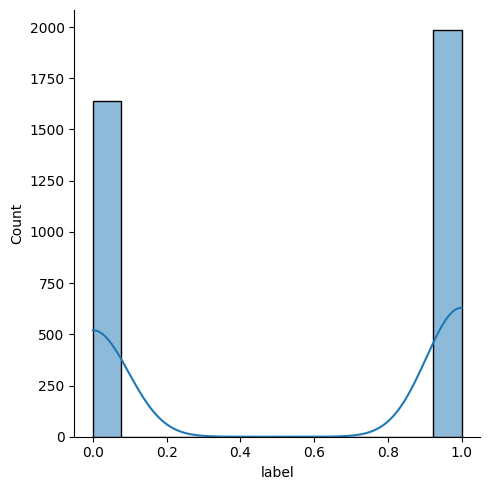

In [63]:
sns.displot(df_reviews['label'], kde=True)

In [64]:
positive_review = df_reviews[df_reviews['label']==1]
positive_review

,review,label
6,fantastic Flight today cabin experienced Altho...,1
8,London Heathrow Mumbai Boeing Business Class l...,1
9,Keflavík Iceland London Heathrow Business Clas...,1
17,Verified friendly check total contrast Gatwick...,1
18,understand British Airways classified airline ...,1
...,...,...
3615,LHRHKG Boeing 230812 written about tired fleet...,1
3617,LHRJFKLAXLHR Check apart being snapped being e...,1
3618,Purser addresses passengers boarding little sh...,1
3620,London CityNew Shannon really seats profession...,1


In [65]:
negative_review = df_reviews[df_reviews['label']==0]
negative_review

,review,label
0,Verified staff trained properly exceptions chi...,0
1,domestic flight operated Cityflyer Ground serv...,0
2,Verified Failed basic travel fundamentals flig...,0
3,baggage simple situation three weeks communica...,0
4,boarding flight leaving hours single staff mem...,0
...,...,...
3600,normally whine LHRCDG Tuesday morning dreaded ...,0
3612,Flight Heathrow Toronto Booked emergency night...,0
3614,Regional operated flight RJ145 Manchester Heat...,0
3616,Bridgetown Barbados flying British Airways fra...,0
